## **An electric car-sharing service company analysis**

## 1.0 Load Data

In [2]:
# import pandas
import pandas as pd
# import numpy
import numpy as np
# import math libraries for ploting
import matplotlib.pyplot as plt 


In [3]:
# read our csv file
df_car=pd.read_csv('/content/drive/MyDrive/Autolib_dataset (2).csv')

Preview our datasets

In [4]:
# preview the first 10 rows of our data
df_car.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


Access our datasets information

In [5]:
# load data information
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

## 2.0 Cleaning Data

### 2.1 Validity

In [6]:
# drop irrelevant data
df_car.drop(columns=['Cars','Charge Slots','Charging Status','Displayed comment','Geo point','Scheduled at','Rental status','Slots','Station type','Subscription status'], inplace=True)


In [7]:
# Preview dataset after dropping irrelevant data
df_car.head()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Public name,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,ok,2018,4,8,17,23


### 2.2 Completeness

In [8]:
# Check the if there is null values
df_car.isnull().sum()

Address               0
Bluecar counter       0
Utilib counter        0
Utilib 1.4 counter    0
City                  0
ID                    0
Kind                  0
Postal code           0
Public name           0
Status                0
year                  0
month                 0
day                   0
hour                  0
minute                0
dtype: int64

### 2.3 Consistency

In [9]:
# check for duplicate values
df_car.duplicated().sum()

0

### 2.4 Uniformity

In [10]:
# change columns names to lowercase.
# replacing space with an _
# removing fullstop values in columns values 
df_car.columns=df_car.columns.str.strip().str.lower().str.replace(' ','_').str.replace('.','')
df_car

,address,bluecar_counter,utilib_counter,utilib_14_counter,city,id,kind,postal_code,public_name,status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,ok,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,Colombes/MÃ©nelotte/8,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,paris-dantzig-37,STATION,75015,Paris/Dantzig/37,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,paris-bac-142,STATION,75007,Paris/Bac/142,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,ok,2018,4,4,17,27


### 2.5 Finding Outliers

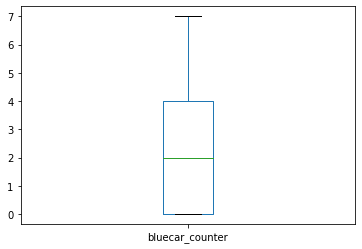

In [25]:
# creat a box plot for Bluecar counter
df_car.boxplot(column=['bluecar_counter'],grid=False)


From boxplot there is no outliers

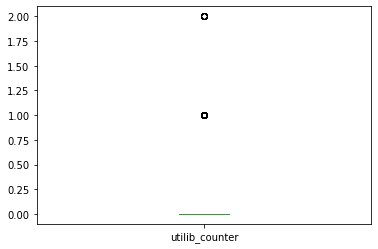

In [26]:
# create a box plot for utilib_counter
df_car.boxplot(column=['utilib_counter'],grid=False)

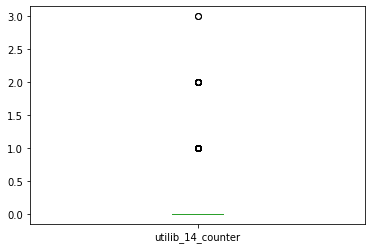

In [28]:
# create a box plot for utilib_14_counter
df_car.boxplot(column=['utilib_14_counter'],grid=False)	

In [13]:
# Delete outliers

# calculate first quantile
Q1=df_car.quantile(0.25)
# calculating third quantile
Q3=df_car.quantile(0.75)
# calculating IQR
IQR=Q3-Q1

# lets remove the outliers based on the IQR range and store in a new dataframe
df_car_new=df_car[~((df_car<(Q1-1.5*IQR))|(df_car>(Q3+1.5*IQR))).any(axis=1)]

# preview our new dataset
df_car_new

,address,bluecar_counter,utilib_counter,utilib_14_counter,city,id,kind,postal_code,public_name,status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,ok,2018,4,6,7,24
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,ok,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,Paris/Voltaire/8,ok,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,Paris/CitroÃ«n CÃ©vennes/Parking,closed,2018,4,8,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,Colombes/MÃ©nelotte/8,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,paris-dantzig-37,STATION,75015,Paris/Dantzig/37,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,paris-bac-142,STATION,75007,Paris/Bac/142,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,ok,2018,4,4,17,27


In [14]:
# desplay the shape of the data
df_car_new.shape

(4210, 15)

## 3.0 Anaylsis Data

In [33]:
# create usage columns for the three cars.
pd.options.mode.chained_assignment=None
# create bluecar usage column
df_car_new['bluecar_usage']=df_car.bluecar_counter.diff()
# create utilib_counter	usage column
df_car_new['utilib_usage']=df_car.utilib_counter.diff()
# create utilib_14_counter usage column
df_car_new['utilib_14_usage']=df_car.utilib_14_counter.diff()

# preview the first 5 dataset
df_car_new.head(5)

,address,bluecar_counter,utilib_counter,utilib_14_counter,city,id,kind,postal_code,public_name,status,year,month,day,hour,minute,bluecar_usage,utilib_usage,utilib_14_usage
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,ok,2018,4,8,11,43,NaN,NaN,NaN
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,ok,2018,4,6,7,24,6.0,0.0,0.0
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,ok,2018,4,8,17,23,0.0,-1.0,0.0
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,Paris/Voltaire/8,ok,2018,4,6,7,2,-3.0,0.0,0.0
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,Paris/CitroÃ«n CÃ©vennes/Parking,closed,2018,4,8,18,20,0.0,0.0,0.0


In [67]:
# Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.
df_paris=df_car_new.loc[(df_car_new['city']=='Paris')&(df_car_new['bluecar_usage']<0.0)]
df_paris
df_hour=df_paris.groupby('hour')['hour'].count().sort_values(ascending=False)
df_hour.head(1)



hour
21    66
Name: hour, dtype: int64

In [69]:
# What is the most popular hour for returning cars?(paris)
df_return=df_car_new.loc[(df_car_new['bluecar_usage']>0.0)&(df_car_new['city']=='Paris')]
df_return
df_hour=df_return.groupby('hour')['hour'].count().sort_values(ascending=False)
df_hour.head(1)

hour
8    41
Name: hour, dtype: int64

In [35]:
# What station is the most popular?
# Overall?
df_pop=df_car_new.loc[(df_car_new['kind']=='STATION')&(df_car_new['status']=='ok')]
df_pop
df_pop.groupby('public_name')['kind'].count().sort_values(ascending=False).head(1)

public_name
Paris/Voltaire/182    11
Name: kind, dtype: int64

In [63]:
# At the most popular picking hour?
df_pick=df_car_new.loc[df_car_new['bluecar_usage']<0.0]
df_pick
df_hour=df_pick.groupby('hour')['hour'].count().sort_values(ascending=False)
df_hour.head(1)

hour
21    98
Name: hour, dtype: int64

In [65]:
# What postal code is the most popular for picking up Blue cars? 
# Overall?
df_postal=df_car_new.loc[(df_car_new['bluecar_usage']>0.0)&(df_car_new['hour']==21)]
df_postal
df_postal_code=df_postal.groupby('postal_code')['bluecar_usage'].count().sort_values(ascending=False)
print(df_postal_code.head(1))

print('*********************************')

# Does the most popular station belong to that postal code?
station_postal=df_car_new.loc[df_car['postal_code']==75015][['public_name','postal_code']]
print(station_postal.head(1))

postal_code
75015    6
Name: bluecar_usage, dtype: int64
*********************************
       public_name  postal_code
0  Paris/Suffren/2        75015


In [70]:
# What is the most popular hour for returning cars?
df_return=df_car_new.loc[df_car_new['bluecar_usage']>0.0]
df_return
df_hour=df_return.groupby('hour')['hour'].count().sort_values(ascending=False)
df_hour.head(1)

hour
11    87
Name: hour, dtype: int64